This notebook was primarily utilized to study the performance on non-adversarial (ASAP) and adversarial (synthetic) datasets.

In [ ]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# import package
!pip install transformers
!pip install bert-tensorflow 
!pip install pyenchant
!pip install -U pip setuptools wheel
!pip install -U spacy
!sudo apt-get install libenchant1c2a
!python -m spacy download en_core_web_sm
!pip install skll
!pip install delayed
!pip install -U scikit-learn
!pip install delayed

# xgboost
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestClassifier
from skll.metrics import kappa

from transformers import BertTokenizer, TFBertModel, T5Tokenizer,  MT5Tokenizer, TFT5ForConditionalGeneration


import warnings
warnings.filterwarnings('ignore')

import numpy as np 
from numpy import asarray
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randint

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

import re
import time
import torch
import transformers as ppb

from nltk.corpus import stopwords
import torch
import torch.nn as nn
import transformers
from transformers import BertTokenizer, BertModel, AutoModel, BertTokenizerFast,BertForSequenceClassification

# Keras functional API
from keras.models import Sequential, Model, load_model, model_from_config
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, Flatten, Lambda
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K

import os
import csv
import copy

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.python.framework.ops import disable_eager_execution

import enchant #  Enchant spellchecking library
import spacy
import re

import urllib.request
from bs4 import BeautifulSoup
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

from nltk import tokenize
nltk.download('punkt')



     |████████████████████████████████| 2.6 MB 4.7 MB/s 
     |████████████████████████████████| 895 kB 49.7 MB/s 
     |████████████████████████████████| 3.3 MB 23.2 MB/s 
     |████████████████████████████████| 636 kB 57.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 5.2 MB/s 
     |████████████████████████████████| 819 kB 24.1 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.2.0
    Uninstalling setuptools-57.2.0:
      Successfully uninstalled setuptools-57.2.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the p

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 6.4 MB 4.2 MB/s 
     |████████████████████████████████| 621 kB 56.8 MB/s 
     |████████████████████████████████| 456 kB 61.7 MB/s 
     |████████████████████████████████| 10.1 MB 57.7 MB/s 
     |████████████████████████████████| 42 kB 2.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  distutils: /usr/local/include/python3.7/catalogue
  sysconfig: /usr/include/python3.7m/catalogue
  distutils: /usr/local/include/pyt

ImportError: ignored

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training_set_rel3.tsv",sep='\t', encoding='ISO-8859-1')
dev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/valid_set.tsv",sep='\t', encoding='ISO-8859-1')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_set.tsv",sep='\t', encoding='ISO-8859-1')

In [ ]:
prompt = pd.DataFrame({"essay_set":[1,2,3,4,5,6,7,8],
                       "prompt":["More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends. Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.",
                                "Write a persuasive essay to a newspaper reflecting your vies on censorship in libraries. Do you believe that certain materials, such as books, music, movies, magazines, etc., should be removed from the shelves if they are found offensive? Support your position with convincing arguments from your own experience, observations, and/or reading.",
                                "Write a response that explains how the features of the setting affect the cyclist. In your response, include examples from the essay that support your conclusion.",
                                "Write a response that explains why the author concludes the story with this paragraph. In your response, include details and examples from the story that support your ideas.",
                                "Describe the mood created by the author in the memoir. Support your answer with relevant and specific information from the memoir.",
                                "Based on the excerpt, describe the obstacles the builders of the Empire State Building faced in attempting to allow dirigibles to dock there. Support your answer with relevant and specific information from the excerpt.",
                                "Write about patience. Being patient means that you are understanding and tolerant. A patient person experience difficulties without complaining.Do only one of the following: write a story about a time when you were patient OR write a story about a time when someone you know was patient OR write a story in your own way about patience.",
                                "We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.” Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part."]})

## Data processing

In [ ]:
def preprocess(df):
  df['normalized_score'] = df['domain1_score'] / df.groupby('essay_set')['domain1_score'].transform('max')

preprocess(train)
y = train['normalized_score']

In [ ]:
def clean_anonymization(essay):
  '''
  function to remove the anoymaization
  '''
  res=[]
  # Lowercase
  essay = essay.lower()
  for i in essay.split():
    if i.startswith("@"):
      continue
    else:
      res.append(i)
  return ' '.join(res)

train['essay']=train['essay'].apply(lambda x:clean_anonymization(x))
# also remove from dev and test
dev['essay']=dev['essay'].apply(lambda x:clean_anonymization(x))
test['essay']=test['essay'].apply(lambda x:clean_anonymization(x))

## Handcrafted Features

In [ ]:
def get_correct_and_incorrect_spelling(df):
  """
  Function that measures lexical diversity which is the ratio of total words to unique words
  """
  # Load spaCy model
  nlp = spacy.load('en_core_web_sm')
  # load the enchant dictionary
  d = enchant.Dict("en_US")
  
  incorrect_spelling = []
  correct_spelling = []
  
  for essay in df['essay']:
    individual = []
    for word in essay.split():
      individual.append(d.check(word))                                                                         
    incorrect_spelling.append(individual.count(False))
    correct_spelling.append(individual.count(True))

  df['correct_spelling'] = correct_spelling
  df['incorrect_spelling'] = correct_spelling
  return df

def get_lexical_diversity(df):
    """
    Function that measures lexical diversity which is
    The ratio of total words to unique words
    """
    diversity = []
    for essay in df['essay']:
      diversity.append(round(len(tk.word_tokenize(essay)) / float(len(set(tk.word_tokenize(essay)))), 2))
    return diversity


def get_list_of_number_of_pos(df):
    """
    Function that parses the essay for each words POS
    Returns tuples containg for now, nouns, verbs, adverbs and adjectives
    """
    noun_cnt = []
    verb_cnt= []
    adv_cnt = []
    adj_cnt = []
    
    nlp = spacy.load('en_core_web_sm')
    for essay in df['essay']:
        parsed_essay = nlp(essay)
        token_pos = [token.pos_ for token in parsed_essay]
        noun_cnt.append(token_pos.count('NOUN'))
        verb_cnt.append(token_pos.count('VERB'))
        adv_cnt.append(token_pos.count('ADV'))
        adj_cnt.append(token_pos.count('ADJ')) 
    df['noun_cnt'] = noun_cnt  
    df['verb_cnt'] = verb_cnt  
    df['adv_cnt'] = adv_cnt  
    df['adj_cnt'] = adj_cnt  

    return df

## NON-ADVERSARIAL 

## Testing Performance

In [ ]:
y = train['normalized_score']
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=0)


In [ ]:
hand_features = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/handcrafted_features.xlsx')
train['incorrect_spelling'] = hand_features['incorrect_spelling']
train['correct_spelling'] = hand_features['correct_spelling']
train['lexical_diversity'] = hand_features['lexical_diversity']
train['noun_cnt'] = hand_features['noun_cnt']
train['verb_cnt'] = hand_features['verb_cnt']
train['adv_cnt'] = hand_features['adv_cnt']
train['adj_cnt'] = hand_features['adj_cnt']
train['length'] = train['essay'].str.split().str.len()
train['avg_word_len'] = train['essay'].str.split().apply(lambda x: np.mean([len(y) for y in x]))
train['std_word_len'] = train['essay'].str.split().apply(lambda x: np.std([len(y) for y in x]))
train['unique_words'] = train['essay'].str.split().apply(lambda x: len(np.unique(x)))

In [ ]:
prompt_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prompt_results_train.csv')
semantic_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semantic_results_train.csv')
semantic_lstm_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semantic_score_train_lstm.csv')

local_coherence_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/local_coherence_results_train.csv')
global_coherence_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global_coherence_results_train.csv')
cosine_sim = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cosine_similarity - Cosine_similarity.csv')

local_coherence_o = local_coherence_o.groupby('Unnamed: 0')['prediction'].apply(list).reset_index()
local_coherence_o.columns = ['essay_id', 'local_coherence_prediction_list']
X_new = train.merge(local_coherence_o,on='essay_id',how='left')

In [ ]:
prompt_o.columns = ['essay_id', 'prompt_prediction']
X_new = X_new.merge(prompt_o,on='essay_id',how='left')

global_coherence_o.columns = ['essay_id', 'global_coherence_prediction']
X_new = X_new.merge(global_coherence_o,on='essay_id',how='left')

semantic_o.columns = ['essay_id', 'semantic_prediction_bert']
X_new = X_new.merge(semantic_o,on='essay_id',how='left')

semantic_lstm_o.columns = ['essay_id', 'semantic_prediction_lstm']
X_new['semantic_prediction_lstm'] = semantic_lstm_o['semantic_prediction_lstm']
X_new['cosine_similarity'] = cosine_sim['cosine_similarity']

X_new = X_new[['cosine_similarity','normalized_score','local_coherence_prediction_list','lexical_diversity','global_coherence_prediction','semantic_prediction_lstm','semantic_prediction_bert', 'essay_set', 'prompt_prediction','domain1_score','length',	'avg_word_len',	'std_word_len',	'unique_words','incorrect_spelling',	'correct_spelling',	'noun_cnt',	'verb_cnt',	'adv_cnt',	'adj_cnt']]
features = ['normalized_score','local_coherence_prediction','global_coherence_prediction','semantic_prediction','prompt_prediction','length', 'avg_word_len','std_word_len',	'unique_words',	'incorrect_spelling',	'correct_spelling',	'noun_cnt',	'verb_cnt',	'adv_cnt',	'adj_cnt']

local_coherence = []
X_new['local_coherence_prediction_list'] = X_new['local_coherence_prediction_list'].fillna(0)

local_coherence_o = local_coherence_o.groupby('essay_id')['local_coherence_prediction_list'].apply(list).reset_index()
for row in range(len(X_new)):
  local_coherence.append(np.mean(np.array(X_new['local_coherence_prediction_list'].iloc[row])))
X_new['local_coherence_prediction'] = local_coherence

In [ ]:
def xgboost(X,y, gamma = 1, learning_rate = 0.001, max_depth = 6):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)
  # define the model for multi-class classification
  mod = xgb.XGBClassifier(
    objective="multi:softmax",
    gamma=gamma,                 
    learning_rate=learning_rate,
    max_depth=max_depth,
    n_estimators=n_estimators,                                                                    
    subsample=subsample,
    random_state=random_state) 
  mod.fit(X_train, y_train)
  preds = mod.predict(X_test)
  QWK=cohen_kappa_score(y_test.astype(int), preds.astype(int), labels=None, weights= 'quadratic', sample_weight=None)
  return QWK

In [ ]:
def evaluate(df, essay_set, features):
    """Regression pipeline with kappa evaluation"""

    X = df[df['essay_set'] == essay_set][features]
    y = df[df['essay_set'] == essay_set]['domain1_score'].astype(np.float64)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    model = xgb.XGBClassifier(gamma = 1, learning_rate = 0.001, max_depth=6) 

    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    return kappa(y_pred, y_test, weights='quadratic')

In [ ]:
my_k = []
my_k_mean = []
for i in range(10):
  kappa_scores = {}
  features = ['semantic_prediction_lstm','global_coherence_prediction','local_coherence_prediction','lexical_diversity','length', 'avg_word_len','std_word_len',	'unique_words',	'incorrect_spelling',	'correct_spelling',	'noun_cnt',	'verb_cnt',	'adv_cnt',	'adj_cnt']
  for topic in range(1, 9):
    kappa_scores[topic] = evaluate(X_new, topic, features)
  my_k.append(kappa_scores)
  my_k_mean.append(np.array([kappa_scores[k] for k in kappa_scores]).mean())

NameError: ignored

# ADVERSARIAL 

## Creating adversarial dataset


In [ ]:
def split_list_adv_set(a_list):
    tenth = len(a_list) // 2
    return a_list[:tenth], a_list[tenth:]

def create_adv_sets(df, examples):
    essay_set = []
    essay_id = []
    essays = []
    essay_num=0
    gold_scores = []
    gold_scores_real = []
    which = []
    total_example_iter = random.sample(range(0, len(df)-1), examples)
    example_adv, example_iter = split_list_adv_set(total_example_iter)
    accounting = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0}
    for iteration in total_example_iter:
      if iteration in example_iter:
        z_prompt = df['prompt'].iloc[iteration]
        essay = df['essay'].iloc[iteration]
        p_essay_set = df['essay_set'].iloc[iteration]
        essay_set.append(p_essay_set)
        gold_scores.append(df['normalized_score'].iloc[iteration])
        gold_scores_real.append(df['domain1_score'].iloc[iteration])
        which.append(0)
      else:
        essay = df['essay'].iloc[iteration]
        p_essay_set = df['essay_set'].iloc[iteration]
        accounting[str(p_essay_set)] -= 1
        r_essay_set = sorted(accounting.items(), key=lambda x: x[1])[0][0]
        upper_bound = sorted(accounting.items(), key=lambda x: x[1])[-1][0]
        while (str(r_essay_set) == str(p_essay_set)) or (str(r_essay_set) == str(upper_bound)) :
          r_essay_set = random.randint(1, 8)
        accounting[str(r_essay_set)] += 1
        z_prompt = prompt.to_dict()['prompt'][int(r_essay_set)-1]
        essay = df['essay'].iloc[iteration]
        essay_set.append(int(r_essay_set))
        gold_scores.append(0)
        gold_scores_real.append(0)
        which.append(1)


      essay_id.append(essay_num)
      essay_num+=1
      essays.append(essay)
       
    random_examples = random.sample(range(0, len(df)), examples // 2)

    for random_example in random_examples:
      b = df['sent'].iloc[random_example]
      if len(b) < 2:
        continue
      shuffled = sorted(b, key=lambda k: random.random())
      while shuffled == b:
        shuffled = sorted(b, key=lambda k: random.random())
      essays.append(' '.join(shuffled))
      essay_set.append(df['essay_set'].iloc[random_example])
      gold_scores.append(0)
      gold_scores_real.append(0)
      essay_id.append(essay_num)
      which.append(2)
      essay_num+=1
    return {'domain1_score': gold_scores_real, 'normalized_score': gold_scores, 'essay': essays, 'essay_set': essay_set, 'essay_id': essay_id, 'types': which}



In [ ]:
def normalize(df):
    df['normalized_score'] = df['domain1_score'] / df.groupby('essay_set')['domain1_score'].transform('max')
    return df

train1 = normalize(train1)
train1['sent'] = train1['essay'].apply(lambda x: tokenize.sent_tokenize(x))

d = create_adv_sets(train1, len(train1) - 1)
df = pd.DataFrame(d)
df1 = df.merge(prompt,on='essay_set',how='left')
df1.to_csv('combined.csv')

## Testing Performance

In [ ]:
c_adv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/combined.csv',error_bad_lines=False, engine="python")
# adv = get_correct_and_incorrect_spelling(adv)
# adv = get_list_of_number_of_pos(adv)
c_adv['length'] = c_adv['essay'].str.split().str.len()
c_adv['avg_word_len'] = c_adv['essay'].str.split().apply(lambda x: np.mean([len(y) for y in x]))
c_adv['std_word_len'] = c_adv['essay'].str.split().apply(lambda x: np.std([len(y) for y in x]))
c_adv['unique_words'] = c_adv['essay'].str.split().apply(lambda x: len(np.unique(x)))

prompt_adv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prompt_combined_adv_results.csv')
prompt_adv.columns = ['essay_id', 'prompt_prediction']
c_adv = c_adv.merge(prompt_adv,on='essay_id',how='left')

gcoh_adv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global_combined_adv_results.csv')
gcoh_adv.columns = ['essay_id', 'global_coherence_prediction']
c_adv = c_adv.merge(gcoh_adv,on='essay_id',how='left')


sem_adv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semantic_combined_adv_results.csv')
sem_adv.columns = ['essay_id', 'semantic_prediction']
c_adv = c_adv.merge(sem_adv,on='essay_id',how='left')

lcoh_adv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/local_combined_adv_results.csv')
lcoh_adv = lcoh_adv.groupby('Unnamed: 0')['local_coherence_prediction'].apply(list).reset_index()
lcoh_adv.columns = ['essay_id', 'local_coherence_prediction_list']
c_adv = c_adv.merge(lcoh_adv,on='essay_id',how='left')
c_adv['local_coherence_prediction_list'] = c_adv['local_coherence_prediction_list'].fillna(0)
lcoh = []
for row in range(len(c_adv)):
  lcoh.append(np.prod(np.array(c_adv['local_coherence_prediction_list'].iloc[row])))
c_adv['local_coherence_prediction'] = lcoh

c_adv_prompt = c_adv[(c_adv['types'] == 1) | (c_adv['types'] == 0)]
c_coh_prompt = c_adv[(c_adv['types'] == 2) | (c_adv['types'] == 0)]


Text(0.5, 0, 'Essay ID')

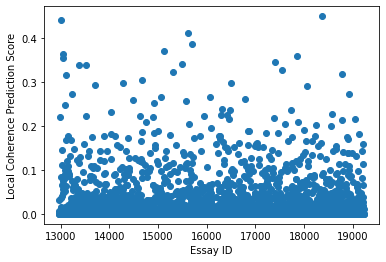

In [ ]:
c_coh_prompt = c_adv[c_adv['types'] == 2]
plt.scatter(c_coh_prompt.index, c_coh_prompt.local_coherence_prediction)
plt.ylabel('Local Coherence Prediction Score')
plt.xlabel('Essay ID')

Text(0.5, 0, 'Essay ID')

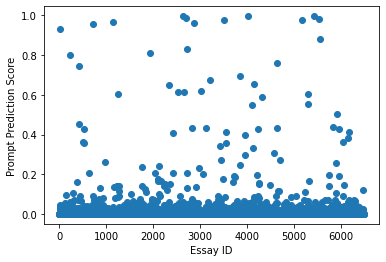

In [ ]:
c_adv_prompt = c_adv[c_adv['types'] == 1]
plt.scatter(c_adv_prompt.index, c_adv_prompt.prompt_prediction)
plt.ylabel('Prompt Prediction Score')
plt.xlabel('Essay ID')


In [ ]:
kappa_scores = {}
features1 = ['semantic_prediction']
features2 = ['length','avg_word_len','std_word_len', 'unique_words']
features3 = ['length','avg_word_len','std_word_len', 'unique_words', 'global_coherence_prediction', 'prompt_prediction', 'semantic_prediction', 'local_coherence_prediction']
for topic in range(1, 9):
  kappa_scores[topic] = evaluate(c_adv, topic, features3)
kappa_scores

{1: 0.9466533784294262,
 2: 0.8621809749982621,
 3: 0.8764234740358335,
 4: 0.8497860530657135,
 5: 0.8645692029557008,
 6: 0.9307815915190574,
 7: 0.8861993740002828,
 8: 0.8429280303719044}

In [ ]:
np.array([kappa_scores[k] for k in kappa_scores]).mean()

0.8824402599220226

## Understanding Feature Importance

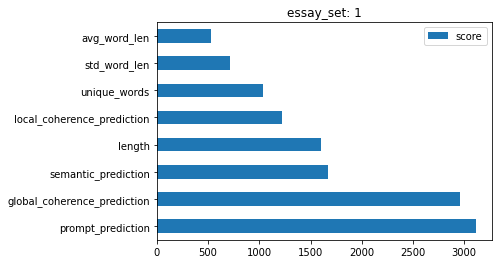

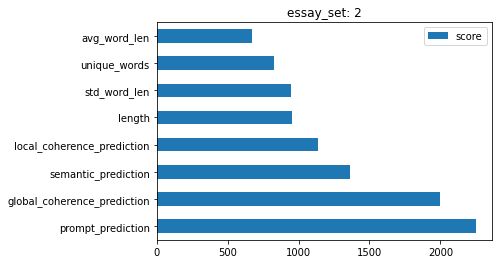

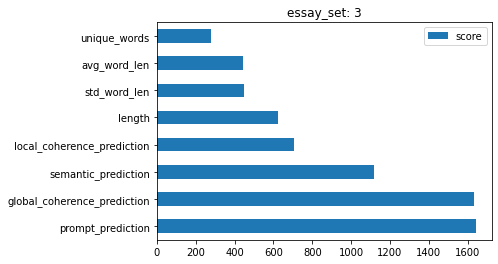

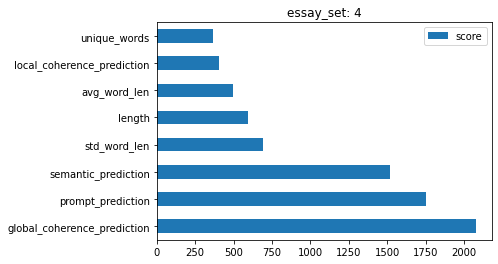

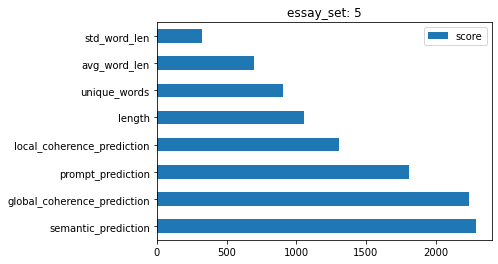

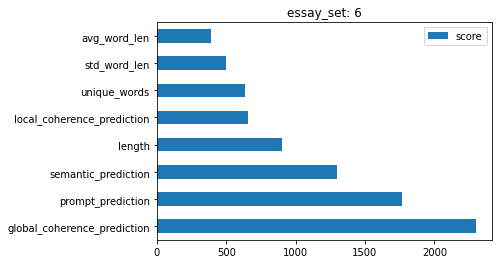

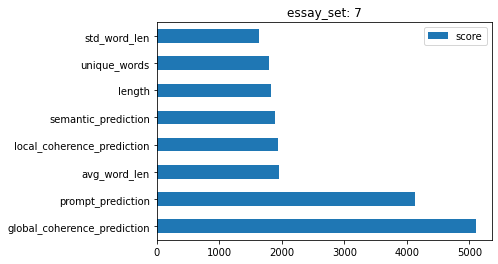

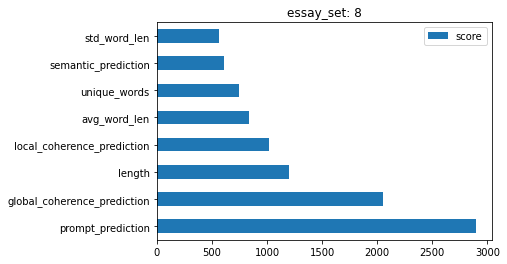

In [ ]:
features = ['length','avg_word_len','std_word_len', 'unique_words', 'global_coherence_prediction', 'prompt_prediction', 'semantic_prediction', 'local_coherence_prediction', 'types']

for essay_set in range(1,9):
  X = c_adv[c_adv['essay_set'] == essay_set][features]
  y = c_adv[c_adv['essay_set'] == essay_set]['domain1_score'].astype(np.float64)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  model = xgb.XGBClassifier(gamma = 1, learning_rate = 0.001, max_depth=6) 

  X_train = X_train[['length','avg_word_len','std_word_len', 'unique_words', 'global_coherence_prediction', 'prompt_prediction', 'semantic_prediction', 'local_coherence_prediction']]

  model.fit(X_train, y_train)

  test_types = X_test.types
  
  X_test = X_test[['length','avg_word_len','std_word_len', 'unique_words', 'global_coherence_prediction', 'prompt_prediction', 'semantic_prediction', 'local_coherence_prediction']]

  feature_important = model.get_booster().get_score(importance_type='weight')
  keys = list(feature_important.keys())
  values = list(feature_important.values())

  data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
  data.plot(kind='barh', title='essay_set: ' + str(essay_set))